# Building Predictive models

In [1]:
import pandas as pd
import os
import numpy as np

## Importing data

In [2]:
# set the path of the processed data
processed_data_path = os.path.join(os.path.pardir,'data','processed')
train_file_path = os.path.join(processed_data_path, 'train.csv')
test_file_path = os.path.join(processed_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [4]:
X = train_df.loc[:,'Age':].values.astype('float')
# uso ravel para convertir el dataframe en un arrego 1D 
# podria haber usado train_df['Survived'].values y obtenia el mismo resultado
# si en lugar de tener un dataset hubiese tenido un arreglo no hubiese tenido la propiedad values

y = train_df['Survived'].ravel()

In [181]:
print (X.shape[1], y.shape)
train_df.info()

37 (891,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 38 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
WCG                   891 non-null int64
RichOldLady           891 non-null int64
PoorOldMan            891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master        

In [6]:
# train test split
# uso la data de training para testear el modelo 
# el datase de test provisto por kaggle es en realidad production data 
# como no tenemos el resultodo (sobrevivio o no) no sirve para ver si el modelo funciona o no

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(712, 37) (712,)
(179, 37) (179,)


In [7]:
print (X_train[0])

[35.     15.2458  3.      1.      0.      1.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      1.      0.      0.
  1.      0.      0.      0.      0.      1.      0.      0.      0.
  0.      1.      0.      1.      0.      0.      1.      0.      1.
  0.    ]


In [8]:
# average survival in train and test
print ('mean survival in train : {0:.3f}'.format(np.mean(y_train)))
print ('mean survival in test : {0:.3f}'.format(np.mean(y_test)))

mean survival in train : 0.383
mean survival in test : 0.385


#### Check Scikit-Learn Version

In [9]:
import sklearn
sklearn.__version__
## Tiene que ser mayor a 0.19
#!conda update -y scikit-learn

'0.21.3'

### Build Baseline model

In [10]:
# import function
from sklearn.dummy import DummyClassifier

In [11]:
# create model
linear_model = DummyClassifier(strategy='most_frequent', random_state=0)
# baseline simepre va a predecir la mayoria de los casos en el dataset 
# en este caso el la mayoria de los casos son para gente que no sobrevivio 
# aprox 38% sobrevivieron y el resto no 
#random seed is the same as used when separating the dataset but it is not necesary

In [12]:
# train model
linear_model.fit(X_train, y_train)
#inout data y output data

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [13]:
#Evaluating the performance on the test dataset
print ('score for baseline model : {0:.2f}'.format(linear_model.score(X_test, y_test)))
#score primero evalua el moelo con el dataset X_test,
#luego compara el resultado con y_test que es el resultado verdadero

#Este es el accuracy del modelo es decir los casos acertados sobre los casos totales


score for baseline model : 0.61


### El resultado anterior quiere decir que para predecir quien murio en el accidente, utilizando un modelo de regresion lineal, se puede obtener  una certeza del 61%.

In [14]:
# peformance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.utils.multiclass import unique_labels

In [15]:
# accuracy score
print ('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, linear_model.predict(X_test))))

accuracy for baseline model : 0.61


In [16]:
# confusion matrix

cm = confusion_matrix(y_test, linear_model.predict(X_test))
print( 'confusion matrix for baseline model: \n {0}'.format(cm))


confusion matrix for baseline model: 
 [[110   0]
 [ 69   0]]


# Solo predice el valor de 0 de la clase negativa

In [17]:
## |        | Predicted       |    Predicted
## |        | Negative        |    Positive
## |Actual  |    110          |      0
## |Negative| (True Negative) |  (False Positive)
## |        |                 |
#  |Actual  |     69          |      0
## |Positive|                 |
## |________|_(False Negative)|    True Positive

#Accuracy = (True Positives + True Negatives) / ( TN + FN + FP + TP)  
#Presicion = True Positive / (TP+FP) 
#Recall = True Positive/(TP+FP)

In [18]:
import matplotlib.pyplot as plt     

labels = [0, 1]
cm = confusion_matrix(y_test, linear_model.predict(X_test), labels)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Titanic')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Figure size 640x480 with 2 Axes>

In [19]:
# precision and recall scores
print ('precision for baseline model : {0:.2f}'.format(precision_score(y_test, linear_model.predict(X_test))))


precision for baseline model : 0.00


/Users/mildo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
print ('recall for baseline model : {0:.2f}'.format(recall_score(y_test, linear_model.predict(X_test))))

recall for baseline model : 0.00


# Submit to kaggle

In [21]:
# converting to the matrix
test_X = test_df.values.astype('float')

In [22]:
# get predictions
predictions = linear_model.predict(test_X)

In [23]:
df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions} )

In [24]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [25]:
submission_data_path = os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_path, '01_linear.csv')
print (os.path.abspath(submission_data_path))

/Users/mildo/MyDocuments/datascience/titanic-ds-python/titanic-ds-python/data/external


In [26]:
df_submission.to_csv(submission_file_path, index=False)

In [27]:
def get_submission_file(model, filename):
    # converting to the matrix
    test_X = test_df.values.astype('float')
    # make predictions
    predictions = model.predict(test_X)
    # submission dataframe
    df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path, filename)
    # write to the file
    df_submission.to_csv(submission_file_path, index=False)

In [28]:
# get submission file
get_submission_file(linear_model, '01_linear.csv')

### Logistic Regression Model

In [29]:
# import function
from sklearn.linear_model import LogisticRegression

In [30]:
# create model
lg_model = LogisticRegression(random_state=0, solver='liblinear')

In [31]:
# train model
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print ('score for logistic regression - version 1 : {0:.2f}'.format(lg_model.score(X_test, y_test)))

score for logistic regression - version 1 : 0.83


In [33]:
# performance metrics
# accuracy
print ('accuracy for logistic regression - version 1 : {0:.2f}'.format(accuracy_score(y_test, lg_model.predict(X_test))))
# confusion matrix
print ('confusion matrix for logistic regression - version 1: \n {0}'.format(confusion_matrix(y_test, lg_model.predict(X_test))))
# precision 
print ('precision for logistic regression - version 1 : {0:.2f}'.format(precision_score(y_test, lg_model.predict(X_test))))
# precision 
print ('recall for logistic regression - version 1 : {0:.2f}'.format(recall_score(y_test, lg_model.predict(X_test))))

accuracy for logistic regression - version 1 : 0.83
confusion matrix for logistic regression - version 1: 
 [[95 15]
 [15 54]]
precision for logistic regression - version 1 : 0.78
recall for logistic regression - version 1 : 0.78


In [34]:
# model coefficients
lg_model.coef_

array([[-0.02963478,  0.00427134, -0.50489296,  0.61100139, -0.67894805,
         0.49390907,  0.19579302, -0.11283846,  0.3325435 , -0.33251825,
        -0.57787989,  0.35768693,  0.93538386,  0.26457143, -0.08022686,
        -0.08368661,  0.85122106,  0.39684463, -0.43219156,  0.24221015,
         1.08144586,  0.38133076, -1.33738422,  0.87128127, -0.02697527,
        -0.39603442,  0.0852801 ,  0.1678749 ,  0.21916681,  0.34355233,
         0.41508149,  0.3553498 ,  0.04544284,  0.3106166 ,  0.50525754,
         0.16863004,  0.64724409]])

### Second Kaggle Submission

In [35]:
# get submission file
get_submission_file(lg_model, '02_lr.csv')

### Hyperparameter Optimization

In [36]:
# base model 
model_lr = LogisticRegression(random_state=0, solver='liblinear')

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1','l2'],'class_weight' : ['balanced',None], 'solver' : ['liblinear','saga'], 'max_iter' : [100,1000,10000]}
lg_model_grid = GridSearchCV(model_lr, param_grid=parameters, cv=3)

In [39]:
## Takes a couple of minutes
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
with ignore_warnings(category=ConvergenceWarning):
    lg_model_grid.fit(X_train, y_train)

In [40]:
lg_model_grid.best_params_

{'C': 1.0,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [41]:
print ('best score : {0:.2f}'.format(lg_model_grid.best_score_))

best score : 0.83


In [42]:
# evaluate model
print ('score for logistic regression - version 2 : {0:.2f}'.format(lg_model_grid.score(X_test, y_test)))

score for logistic regression - version 2 : 0.83


### Making third submission

In [43]:
# get submission file
get_submission_file(lg_model_grid, '03_lr.csv')

### Feature Normalization and Standardization

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Feature Normalization

In [45]:
# feature normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_train_scaled[:,0].min(),X_train_scaled[:,0].max()

(0.0, 1.0)

In [47]:
# normalize test data
X_test_scaled = scaler.transform(X_test)

#### Feature Standardization

In [48]:
# feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0].min(),X_train_scaled[:,0].max()

(-2.143955101825949, 3.8031127012897366)

#### Create model after standardization

In [49]:
# base model 
model_lr = LogisticRegression(random_state=0, solver='liblinear')
parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1','l2']}#,'max_iter' : [1000,5000,10000]} #,'class_weight' : ['balanced',None], 'solver' : ['liblinear'], 'max_iter' : [1000,5000,10000]}
lg_model_grid_scaled = GridSearchCV(model_lr, param_grid=parameters, cv=3)
lg_model_grid_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
lg_model_grid_scaled.best_score_

0.8132022471910112

In [51]:
# evaluate model
print ('score for logistic regression - version 2 : {0:.2f}'.format(lg_model_grid_scaled.score(X_test_scaled, y_test)))

score for logistic regression - version 2 : 0.84


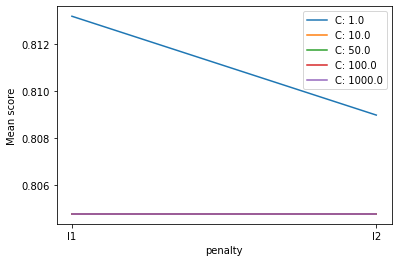

In [52]:
scores = lg_model_grid_scaled.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(parameters['C']), len(parameters['penalty']))

for ind, i in enumerate(parameters['C']):
    plt.plot(parameters['penalty'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('penalty')
plt.ylabel('Mean score')
plt.show()

### Model Persistence


In [53]:
# import pickle library
import pickle

In [54]:
# create the file paths
model_file_path = os.path.join(os.path.pardir,'models','lr_model.pkl')
scaler_file_path = os.path.join(os.path.pardir,'models','lr_scaler.pkl')

In [55]:
# open the files to write 
model_file_pickle = open(model_file_path, 'wb')
scaler_file_pickle = open(scaler_file_path, 'wb')

In [56]:
# persist the model and scaler
pickle.dump(lg_model_grid_scaled, model_file_pickle)
pickle.dump(scaler, scaler_file_pickle)

In [57]:
# close the file
model_file_pickle.close()
scaler_file_pickle.close()

#### load the persisted file


In [58]:
# open files in read mode
model_file_pickle = open(model_file_path, 'rb')
scaler_file_pickle = open(scaler_file_path, 'rb')
# load files
clf_loaded = pickle.load(model_file_pickle)
scaler_loaded = pickle.load(scaler_file_pickle)
# close files
model_file_pickle.close()
scaler_file_pickle.close()

In [59]:
clf_loaded

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
scaler_loaded

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
# transform the test data using loaded scaler object
X_test_scaled = scaler_loaded.transform(X_test)
# calculate the score using loaded model object 
print ('score for persisted logistic regression : {0:.2f}'.format(clf_loaded.score(X_test_scaled, y_test)))

score for persisted logistic regression : 0.84


In [62]:
### Third Kaggle Submission

In [63]:
def get_submission_file_with_standardization(model,filename, scaler):
    # converting to the matrix
    test_X = test_df.values.astype('float')
    # standardization
    if (scaler!=None):
        test_X = scaler.transform(test_X)
    # make predictions
    predictions = model.predict(test_X)
    # submission dataframe
    df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path, filename)
    # write to the file
    df_submission.to_csv(submission_file_path, index=False)

In [64]:
# get submission file
get_submission_file_with_standardization(lg_model_grid_scaled, '04_lr.csv', scaler)

### Random Forest Model


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
random_forest_scaled = RandomForestClassifier(random_state=0,n_estimators=10)
random_forest_scaled.fit(X_train_scaled, y_train)
# evaluate model
print ('score for random forest - version 1 : {0:.2f}'.format(random_forest_scaled.score(X_test_scaled, y_test)))

score for random forest - version 1 : 0.82


In [67]:
random_forest = RandomForestClassifier(random_state=0,n_estimators=10)
random_forest.fit(X_train, y_train)
# evaluate model
print ('score for random forest - version 1 : {0:.2f}'.format(random_forest.score(X_test, y_test)))

score for random forest - version 1 : 0.82


In [68]:
# get submission file
get_submission_file_with_standardization(random_forest_scaled, '05_rf_scaled.csv', scaler)

In [69]:
# get submission file
get_submission_file_with_standardization(random_forest, '05_rf_notscaled.csv', None)

In [70]:
print ('precision for random fores no scaled model : {0:.2f}'.format(precision_score(y_test, random_forest.predict(X_test))))

print ('recall for random fores no scaled model : {0:.2f}'.format(recall_score(y_test, random_forest.predict(X_test))))

precision for random fores no scaled model : 0.80
recall for random fores no scaled model : 0.70


In [71]:
print ('precision for random fores  scaled model : {0:.2f}'.format(precision_score(y_test, random_forest_scaled.predict(X_test_scaled))))

print ('recall for random fores  scaled model : {0:.2f}'.format(recall_score(y_test, random_forest_scaled.predict(X_test_scaled))))

precision for random fores  scaled model : 0.80
recall for random fores  scaled model : 0.70


### Hyperparameters tunning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {'n_estimators':[50, 100, 200,1000], 
              'min_samples_leaf':[1, 5,10,50],
              'max_features' : ('auto','sqrt','log2'),
               }
rf = RandomForestClassifier(random_state=0, oob_score=True)
rf_grid = GridSearchCV(rf, parameters, cv=5)

In [74]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'ma

In [75]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [76]:
# best score
print ('best score for random forest : {0:.2f}'.format(rf_grid.best_score_))

print ('rf_grid.best_estimator_: {0:.2f}'.format(rf_grid.best_estimator_.score(X_test, y_test)))
print ('rf_grid.score : {0:.2f}'.format(rf_grid.score(X_test, y_test)))

rf = RandomForestClassifier(random_state=0, oob_score=True)
rf_grid_scaled = GridSearchCV(rf, parameters, cv=5)
rf_grid_scaled.fit(X_train_scaled, y_train)
print ('rf_grid_scaled.score : {0:.2f}'.format(rf_grid_scaled.score(X_test_scaled, y_test)))
get_submission_file_with_standardization(rf_grid_scaled, '05_rf_hp_tunning_scaled.csv', scaler)

best score for random forest : 0.84
rf_grid.best_estimator_: 0.84
rf_grid.score : 0.84
rf_grid_scaled.score : 0.84


In [77]:
# get submission file
get_submission_file(rf_grid, '05_rf_hp_tunning.csv')

### Confusion Metrics , Precision and Recall

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [79]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression(random_state=0, solver='liblinear')

In [82]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
model.score(X_test, y_test)

0.8324022346368715

In [84]:
pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.8231225296442688

In [85]:
# Predict on Final Test data

In [86]:
test_X = test_df.values.astype('float')

In [87]:
test_X = scaler.transform(test_X)

In [88]:
predictions = model.predict_proba(test_X)

In [89]:
print (predictions.shape)

(418, 2)


# LightGBM

In [90]:
#!pip install lightgbm
#!brew install libomp

In [91]:
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

/Users/mildo/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [165]:
estimator = LGBMClassifier(random_state=0)

param_grid = {
    'learning_rate': [ 0.345,0.35,0.355,0.36],
    'n_estimators': [8,10,20],
    'num_leaves' : [25] 
}

lgbm = GridSearchCV(estimator, param_grid, cv=3)
lgbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', lgbm.best_params_)
print('Best parameters found by grid search are:', lgbm.best_score_)

y_pred = lgbm.predict(X_test)


Best parameters found by grid search are: {'learning_rate': 0.355, 'n_estimators': 8, 'num_leaves': 25}
Best parameters found by grid search are: 0.8441011235955056


In [166]:
#{'learning_rate': 0.3, 'n_estimators': 10, 'num_leaves': 30} -->102+51
#{'learning_rate': 0.35, 'n_estimators': 9, 'num_leaves': 28} --> 104+50
#{'learning_rate': 0.35, 'n_estimators': 9, 'num_leaves': 26} --> 104+50
#{'learning_rate': 0.35, 'n_estimators': 9, 'num_leaves': 25} --> 102 +52
#{'learning_rate': 0.35, 'n_estimators': 9, 'num_leaves': 24} --> 103 +50
model_lgbm = LGBMClassifier( random_state=0, learning_rate= 0.355, n_estimators = 8, num_leaves= 25)

model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)

# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.4025061157105039


In [171]:
labels = [0, 1]
cm = confusion_matrix(y_test, model_lgbm.predict(X_test), labels=labels)
print (cm)
print(cm[0,0] + cm[1,1])
print ('precision for random fores no scaled model : {0:.2f}'.format(precision_score(y_test, model_lgbm.predict(X_test))))

print ('recall for random fores no scaled model : {0:.2f}'.format(recall_score(y_test, model_lgbm.predict(X_test))))
# evaluate model

print ('score for random forest - version 1 : {0:.2f}'.format((104+50)/(19+6+104+50)))

[[100  10]
 [ 19  50]]
150
precision for random fores no scaled model : 0.83
recall for random fores no scaled model : 0.72
score for random forest - version 1 : 0.86


In [95]:
estimator = LGBMClassifier(random_state=0)

param_grid = {
    'learning_rate': [ 0.1,0.15,0.2,0.25,0.3],
    'n_estimators': [10,20,30,40,50,70,100,130,150],
    'num_leaves' : [30,50,70,100] 
}

lgbm_scaled = GridSearchCV(estimator, param_grid, cv=3)
lgbm_scaled.fit(X_train_scaled, y_train)

print('Best parameters found by grid search are:', lgbm.best_params_)



Best parameters found by grid search are: {'learning_rate': 0.3, 'n_estimators': 10, 'num_leaves': 30}


In [96]:
model_lgbm_scaled = LGBMClassifier( random_state=0, learning_rate = 0.3, n_estimators = 10, num_leaves = 30)

model_lgbm_scaled.fit(X_train_scaled, y_train)

y_pred = model_lgbm_scaled.predict(X_test_scaled)

# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

labels = [0, 1]
cm = confusion_matrix(y_test, model_lgbm_scaled.predict(X_test_scaled), labels=labels)
print (cm)

print ('precision for random fores no scaled model : {0:.2f}'.format(precision_score(y_test, model_lgbm_scaled.predict(X_test_scaled))))

print ('recall for random fores no scaled model : {0:.2f}'.format(recall_score(y_test, model_lgbm_scaled.predict(X_test_scaled))))
# evaluate model

print ('score for random forest - version 1 : {0:.2f}'.format((102+51)/(18+8+102+51)))

The rmse of prediction is: 0.38111861230861543
[[102   8]
 [ 18  51]]
precision for random fores no scaled model : 0.86
recall for random fores no scaled model : 0.74
score for random forest - version 1 : 0.85


In [97]:
# get submission file
get_submission_file(model_lgbm, '06_lgbm_hp_tunning.csv')
get_submission_file_with_standardization(model_lgbm_scaled, '06_lgbm_hp_tunning_scaled.csv', scaler)

## SVC   C-Support Vector Classification.

In [98]:
from sklearn.svm import SVC, LinearSVC
estimador = SVC(random_state=0)
print (estimador.get_params().keys())
parameters = {  'kernel': ['rbf'],
    'C':     [7,8,9,10,20,25,30,70,100],
    'gamma': [0.0001,0.001,0.008,0.009,0.01,0.011],
    'probability': [True]
}
svc_grid = GridSearchCV(estimator=estimador, param_grid=parameters, cv=5, iid=False)
svc_grid.fit(X_train, y_train)
score = svc_grid.score(X_test, y_test)
print('%s: %.2f' % (estimador.__class__.__name__, score))
print(svc_grid.best_params_)
# get submission file
get_submission_file(svc_grid, '07_svc_hp_tunning.csv')
labels = [0, 1]
cm = confusion_matrix(y_test, svc_grid.predict(X_test), labels=labels)
print (cm)

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
SVC: 0.80
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}
[[94 16]
 [20 49]]


## GradientBoosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
estimador = GradientBoostingClassifier(random_state=0,n_estimators=50)
estimador.get_params().keys()
parameters = {'learning_rate': np.logspace(-4, 0, 10)}
gradientBoosting = GridSearchCV(estimator=estimador, param_grid=parameters, cv=5, iid=False)


In [100]:
gradientBoosting.fit(X_train, y_train)
score = gradientBoosting.score(X_test, y_test)
print('%s: %.2f' % (gradientBoosting.__class__.__name__, score))
get_submission_file(gradientBoosting, '08_GradientBoosting_hp_tunning.csv')

GridSearchCV: 0.82


## Neural Networks

In [101]:
from sklearn.neural_network import MLPClassifier
network = MLPClassifier( hidden_layer_sizes=(10,5, 2), random_state=0,max_iter=800)
print (network.get_params().keys())


dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [102]:
network.fit(X_train, y_train)
score = network.score(X_test, y_test)
print('%s: %.2f' % (network.__class__.__name__, score))
get_submission_file(network, '09_deepNN.csv')

MLPClassifier: 0.61


# Voting Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
vc = VotingClassifier(estimators=[('network', network), ('gbc', gradientBoosting), ('svm', svc_grid),('model_lgbm_scaled', model_lgbm_scaled), ('model_lgbm', model_lgbm), ('rf_grid_scaled', rf_grid_scaled)], voting='soft', n_jobs=4, weights=[3,1,2,3,1,2])
vc = vc.fit(X_train, y_train)
score = vc.score(X_test, y_test)
print('%s: %.2f' % (vc.__class__.__name__, score))

VotingClassifier: 0.84


# Summary

In [106]:
print ('score for baseline model : {0:.2f}'.format(linear_model.score(X_test, y_test)))
print ('score for lg_model     		    : {0:.2f}'.format(lg_model.score(X_test_scaled, y_test)))
print ('score for lg_model_grid 		: {0:.2f}'.format(lg_model_grid.score(X_test_scaled, y_test)))
print ('score for lg_model_grid_scaled  : {0:.2f}'.format(lg_model_grid_scaled.score(X_test_scaled, y_test)))
print ('score for random_forest_scaled  : {0:.2f}'.format(random_forest_scaled.score(X_test, y_test)))
print ('score for random_forest    	    : {0:.2f}'.format(random_forest.score(X_test, y_test)))
print ('rf_grid.best_estimator_: {0:.2f}'.format(rf_grid.best_estimator_.score(X_test, y_test)))
print ('rf_grid_scaled.score : {0:.2f}'.format(rf_grid_scaled.score(X_test_scaled, y_test)))
print ('model_lgbm')
labels = [0, 1]
cm = confusion_matrix(y_test, model_lgbm.predict(X_test), labels=labels)
print (cm)
print ('model_lgbm')
labels = [0, 1]
cm = confusion_matrix(y_test, model_lgbm_scaled.predict(X_test_scaled), labels=labels)
print (cm)
print ('svc_grid')
labels = [0, 1]
cm = confusion_matrix(y_test, svc_grid.predict(X_test), labels=labels)
print (cm)
print ('gradientBoosting')
print('%s: %.2f' % (gradientBoosting.__class__.__name__, gradientBoosting.score(X_test, y_test))) 
print ('network')
score = network.score(X_test, y_test)
print('%s: %.2f' % (network.__class__.__name__, score))

score for baseline model : 0.61
score for lg_model     		    : 0.75
score for lg_model_grid 		: 0.75
score for lg_model_grid_scaled  : 0.61
score for random_forest_scaled  : 0.64
score for random_forest    	    : 0.82
rf_grid.best_estimator_: 0.84
rf_grid_scaled.score : 0.63
model_lgbm
[[102   8]
 [ 18  51]]
model_lgbm
[[102   8]
 [ 18  51]]
svc_grid
[[94 16]
 [20 49]]
gradientBoosting
GridSearchCV: 0.82
network
MLPClassifier: 0.61
